## Project - Customer Churn

In [181]:
#TODO
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv', sep=',')
print(df.isna().sum())
print(df.shape)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
(7043, 21)


In [3]:
print(df.nunique())
print(df.info())

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            704

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
print(df.duplicated().sum())
#data = data.drop_duplicates(keep='first')

0


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [35]:
print(df['TotalCharges'].isna().sum())
df['TotalCharges'].describe()

0


count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [11]:
df = df.dropna(subset = ['TotalCharges'])

In [12]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [13]:
map_multlines = {'Yes': 0, 'No': 1, 'No phone service': 2}
map_intser ={'DSL': 0, 'Fiber optic': 1, 'No': 2}
map_onlsec ={'Yes': 0, 'No': 1, 'No internet service': 2}
map_onlbac = {'Yes': 0, 'No': 1, 'No internet service': 2}
map_devprot ={'Yes': 0, 'No': 1, 'No internet service': 2}
map_techsup ={'Yes': 0, 'No': 1, 'No internet service': 2}
map_streamTV ={'Yes': 0, 'No': 1, 'No internet service': 2}
map_streamMov ={'Yes': 0, 'No': 1, 'No internet service': 2}
map_contract = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
map_paymeth= {'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3}

In [14]:
df['MultipleLines'] = df['MultipleLines'].replace(map_multlines)
df['InternetService'] = df['InternetService'].replace(map_intser)
df['OnlineSecurity'] = df['OnlineSecurity'].replace(map_onlsec)
df['OnlineBackup'] = df['OnlineBackup'].replace(map_onlbac)
df['DeviceProtection'] = df['DeviceProtection'].replace(map_devprot)
df['TechSupport'] = df['TechSupport'].replace(map_techsup)
df['StreamingTV'] = df['StreamingTV'].replace(map_streamTV)
df['StreamingMovies'] = df['StreamingMovies'].replace(map_streamMov)
df['Contract'] = df['Contract'].replace(map_contract)
df['PaymentMethod'] = df['PaymentMethod'].replace(map_paymeth)

In [16]:
dummies = pd.get_dummies(df[['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', ]], drop_first = True, dtype = 'int')
dummies.columns


Index(['gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'PaperlessBilling_Yes', 'Churn_Yes'],
      dtype='object')

In [17]:
X_feat = df[['tenure','MonthlyCharges', 'TotalCharges']]
scaler = PowerTransformer('yeo-johnson')
X_scaled_pw = scaler.fit_transform(X_feat)
X_rescaled = X_feat.copy()
X_rescaled[:] = X_scaled_pw[:]

In [216]:
cust_churn = pd.concat([X_rescaled,df[[ 'SeniorCitizen','MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']], dummies], axis=1)


In [217]:
cust_churn.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaymentMethod', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes',
       'Churn_Yes'],
      dtype='object')

In [218]:
cust_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tenure                7032 non-null   float64
 1   MonthlyCharges        7032 non-null   float64
 2   TotalCharges          7032 non-null   float64
 3   SeniorCitizen         7032 non-null   int64  
 4   MultipleLines         7032 non-null   int64  
 5   InternetService       7032 non-null   int64  
 6   OnlineSecurity        7032 non-null   int64  
 7   OnlineBackup          7032 non-null   int64  
 8   DeviceProtection      7032 non-null   int64  
 9   TechSupport           7032 non-null   int64  
 10  StreamingTV           7032 non-null   int64  
 11  StreamingMovies       7032 non-null   int64  
 12  Contract              7032 non-null   int64  
 13  PaymentMethod         7032 non-null   int64  
 14  gender_Male           7032 non-null   int64  
 15  Partner_Yes           7032

In [219]:
cust_churn.isna().sum()

tenure                  0
MonthlyCharges          0
TotalCharges            0
SeniorCitizen           0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaymentMethod           0
gender_Male             0
Partner_Yes             0
Dependents_Yes          0
PhoneService_Yes        0
PaperlessBilling_Yes    0
Churn_Yes               0
dtype: int64

In [220]:
cust_churn_graph = pd.concat([df[[ 'SeniorCitizen','tenure','MonthlyCharges', 'TotalCharges','MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']], dummies], axis=1)


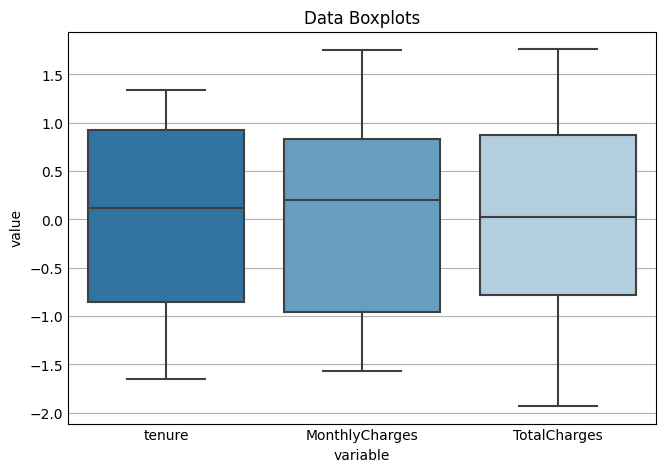

In [251]:
plt.figure(figsize=(6,4))
sns.boxplot(x="variable", y="value", data=pd.melt(cust_churn[['tenure','MonthlyCharges', 'TotalCharges']]))
plt.title('Data Boxplots')
plt.show()

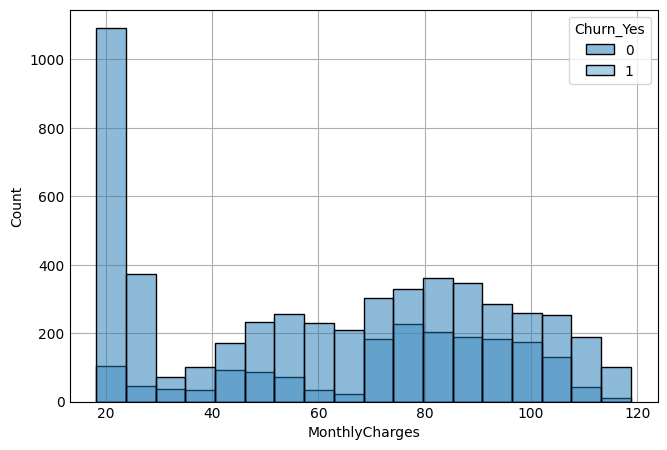

In [252]:
plt.figure(figsize=(6,4))
sns.histplot(data = cust_churn_graph,x = "MonthlyCharges",hue = "Churn_Yes")
plt.show()

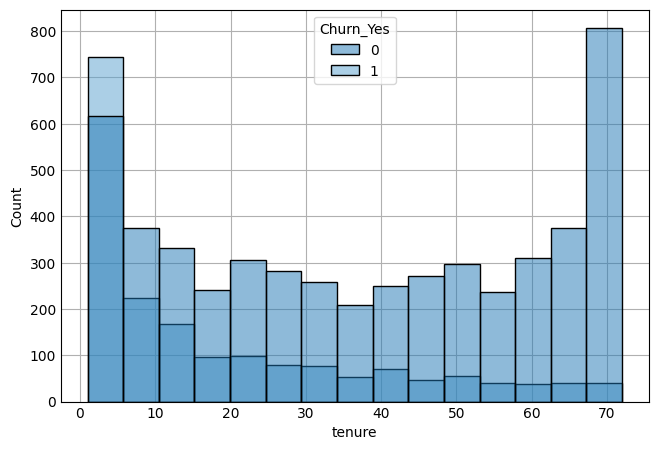

In [263]:
plt.figure(figsize=(6,4))
sns.histplot(data = cust_churn_graph,x = "tenure",hue = "Churn_Yes")
plt.show()

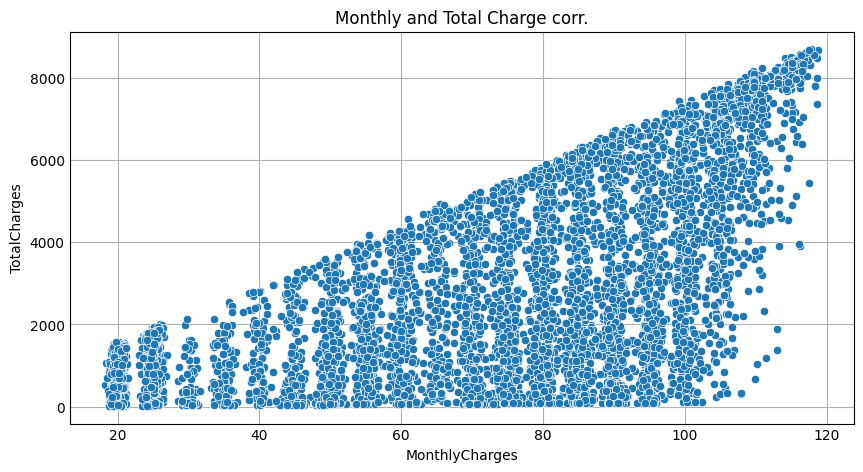

In [273]:
plt.figure(figsize=(8, 4))
plt.title("Monthly and Total Charge corr.")
sns.scatterplot(x=cust_churn_graph['MonthlyCharges'], y=cust_churn_graph['TotalCharges'])
plt.show()

<Figure size 1000x400 with 0 Axes>

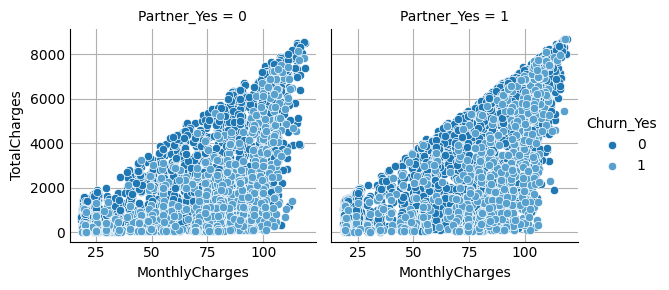

In [265]:
plt.figure(figsize=(10,4))
g = sns.FacetGrid(cust_churn_graph, col="Partner_Yes", hue="Churn_Yes")
g.map(sns.scatterplot, "MonthlyCharges", "TotalCharges", alpha=1)
g.add_legend()
plt.show()

<Axes: xlabel='Churn_Yes', ylabel='Count'>

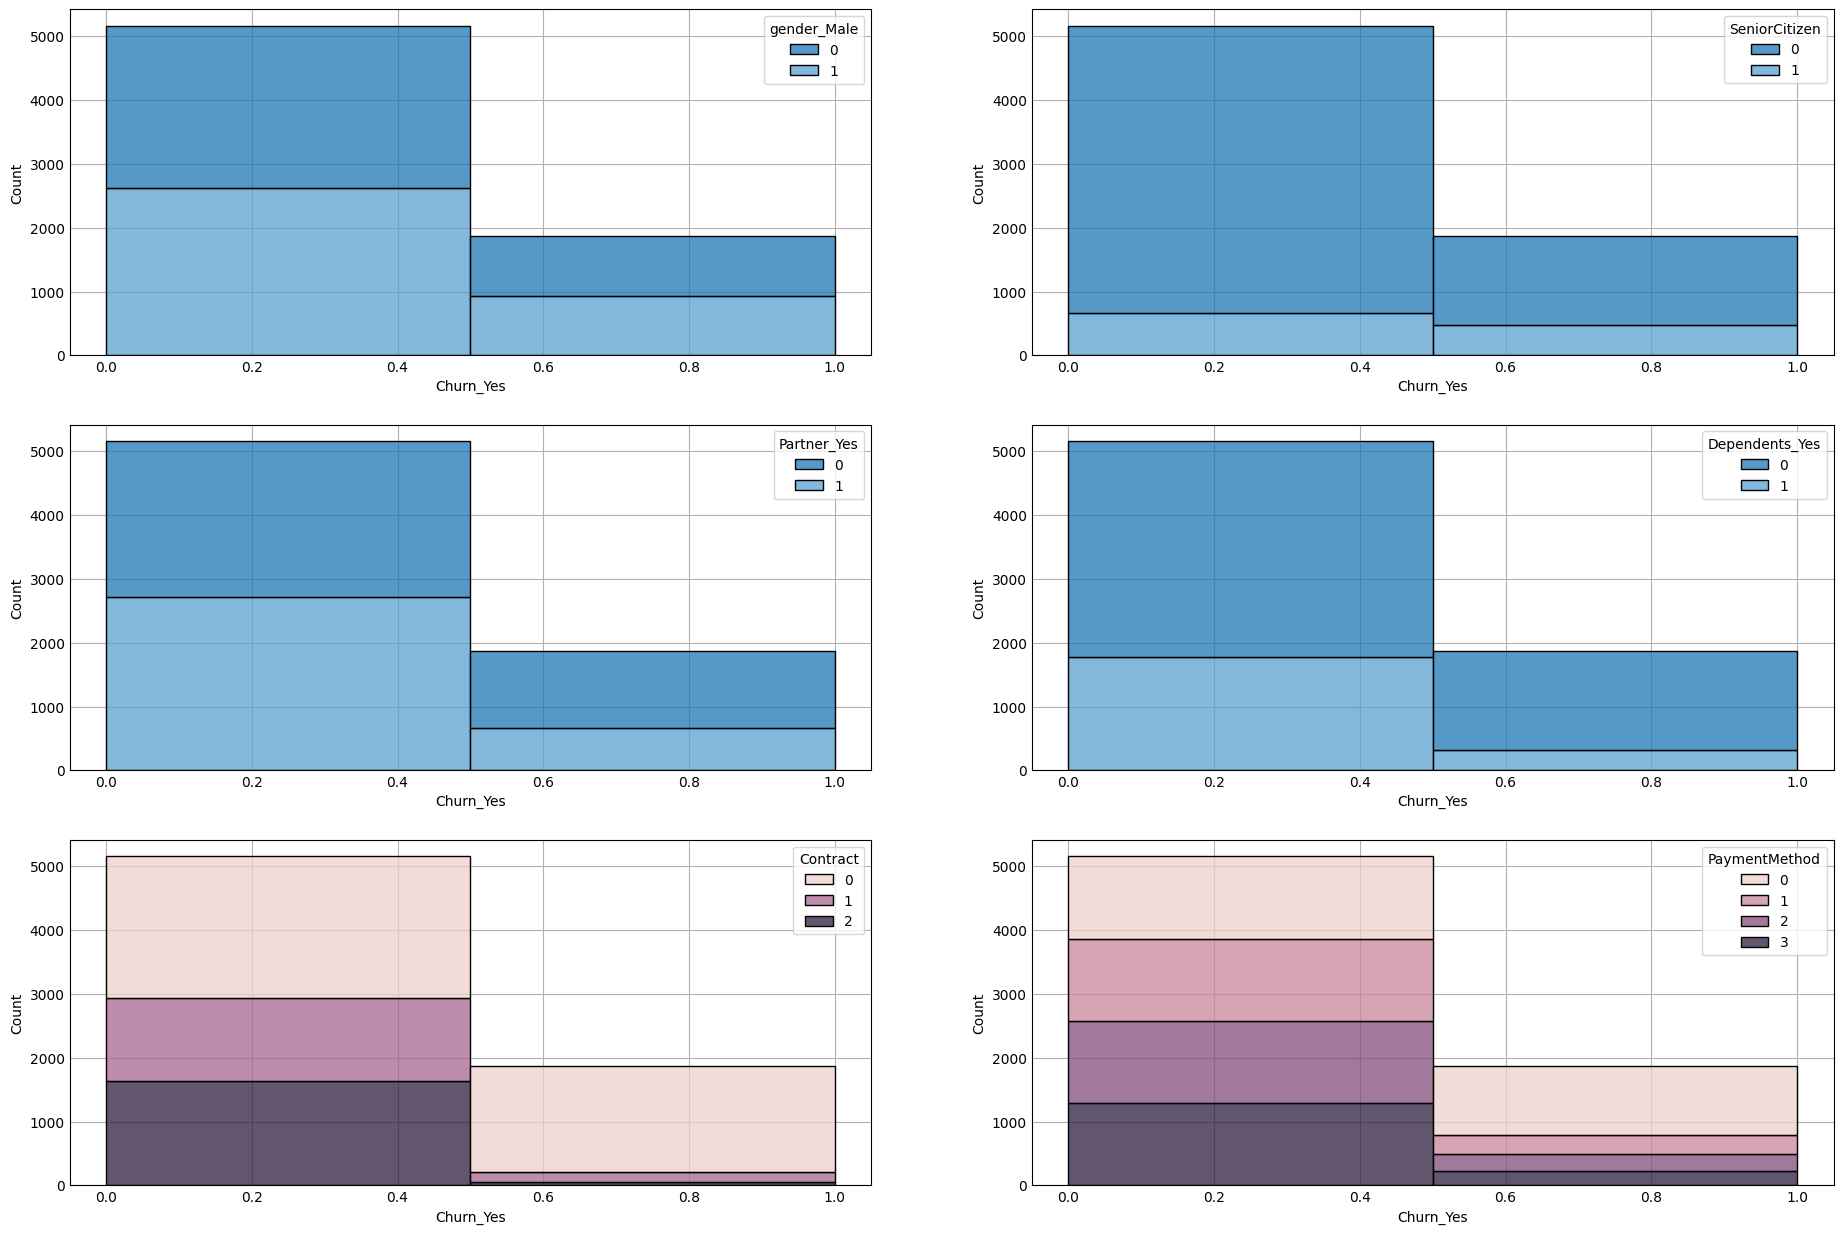

In [262]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
sns.histplot(ax=axes[0, 0],binwidth=0.5, x=cust_churn_graph['Churn_Yes'], hue=cust_churn_graph['gender_Male'], stat="count", multiple="stack")
sns.histplot(ax=axes[0, 1],binwidth=0.5, x=cust_churn_graph['Churn_Yes'], hue=cust_churn_graph['SeniorCitizen'], stat="count", multiple="stack")
sns.histplot(ax=axes[1, 0],binwidth=0.5, x=cust_churn_graph['Churn_Yes'], hue=cust_churn_graph['Partner_Yes'], stat="count", multiple="stack")
sns.histplot(ax=axes[1, 1],binwidth=0.5, x=cust_churn_graph['Churn_Yes'], hue=cust_churn_graph['Dependents_Yes'], stat="count", multiple="stack")
sns.histplot(ax=axes[2, 0],binwidth=0.5, x = cust_churn_graph['Churn_Yes'], hue = cust_churn_graph["Contract"],stat="count", multiple="stack" )
sns.histplot(ax=axes[2,1],binwidth=0.5, x = cust_churn_graph['Churn_Yes'], hue = cust_churn_graph['PaymentMethod'],stat="count", multiple="stack")



<Axes: >

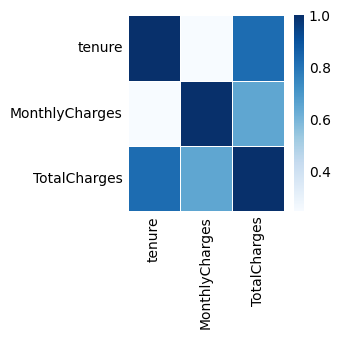

In [278]:
sns.heatmap(cust_churn_graph[['tenure','MonthlyCharges', 'TotalCharges']].corr(), linewidth=0.5, cmap="Blues", xticklabels=True, yticklabels=True)


In [224]:
cust_churn['Churn_Yes'].value_counts()

Churn_Yes
0    5163
1    1869
Name: count, dtype: int64

In [225]:
X = cust_churn.drop(['Churn_Yes'], axis =1)
y = cust_churn['Churn_Yes']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
##Logistic Regression

In [227]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [228]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.66      0.51      0.58       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



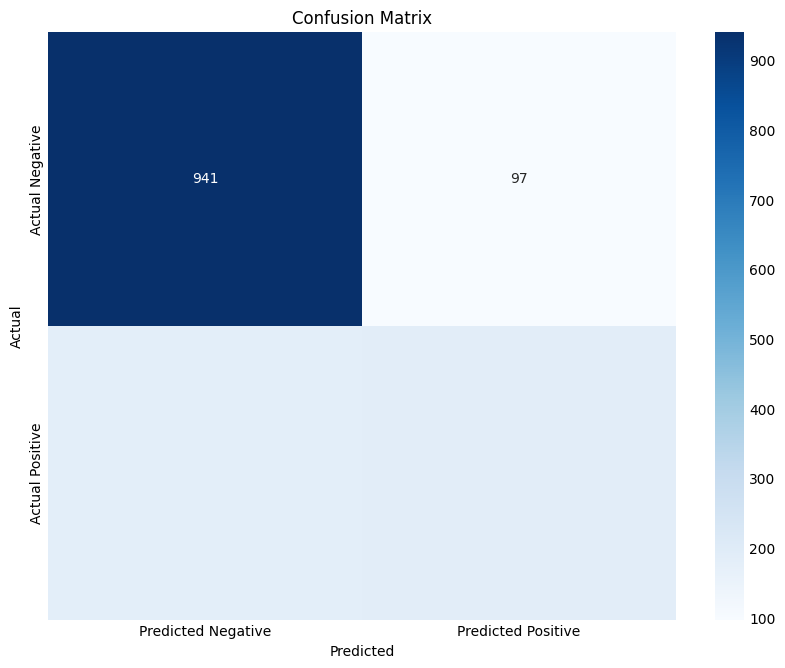

In [229]:
confusion = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap = 'Blues', cbar=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [230]:
import scipy
lr = LogisticRegression()

param_dist = {
    'C': scipy.stats.expon(scale=100)
    }

n_iter_search = 30 # n_iter is the number of hyperparameters settings that are tried
grid = RandomizedSearchCV(lr,
                         param_distributions=param_dist,
                         n_iter=n_iter_search,
                         verbose=1, 
                         cv = 5,
                         n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x13c5df400>},
                   verbose=1)

In [231]:
grid.best_params_

{'C': 91.48303437916564}

In [232]:
lr = LogisticRegression(C= 91.48303437916564)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [233]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.67      0.52      0.58       369

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [68]:
##SVC

In [234]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1038
           1       0.68      0.43      0.53       369

    accuracy                           0.80      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



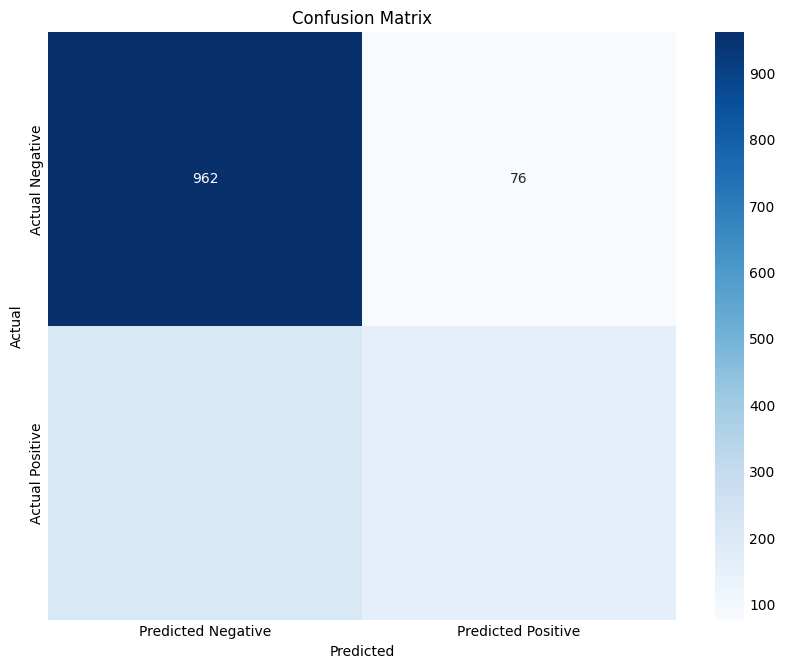

In [235]:
confusion = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap = 'Blues', cbar=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [84]:
import scipy
svc = SVC()

param_dist = {
    'C': scipy.stats.expon(scale=100),
    'gamma': scipy.stats.expon(scale=.1), 
    'kernel' : ['linear', 'poly', 'rbf']
    }

n_iter_search = 20 # n_iter is the number of hyperparameters settings that are tried
grid = RandomizedSearchCV(svc,
                         param_distributions=param_dist,
                         n_iter=n_iter_search,
                         verbose=1, 
                         cv = 5,
                         n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x12bfa8340>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x12bfeeda0>,
                                        'kernel': ['linear', 'poly', 'rbf']},
                   verbose=1)

In [85]:
grid.best_params_

{'C': 12.492718723288649, 'gamma': 0.04363830161271144, 'kernel': 'poly'}

In [86]:
svc = SVC(C= 12.492718723288649, gamma = 0.04363830161271144, kernel= 'poly')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      1038
           1       0.70      0.48      0.57       369

    accuracy                           0.81      1407
   macro avg       0.77      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [92]:
print('ROC AUC score:', roc_auc_score(y_test, y_pred_svc))

ROC AUC score: 0.7050652442940614


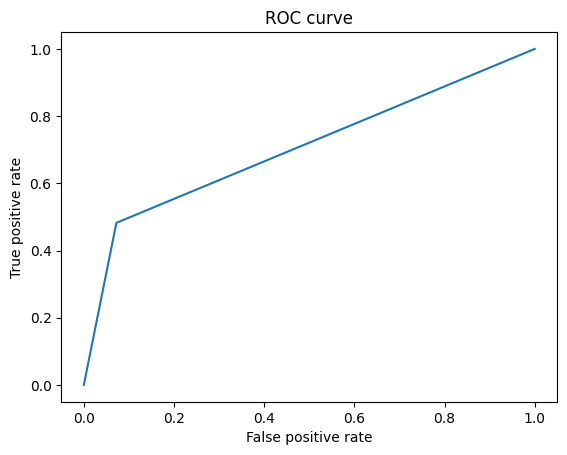

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc)

plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [ ]:
##RFC

In [236]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_rc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1038
           1       0.64      0.49      0.56       369

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



Text(0.5, 1.0, 'Features Importance')

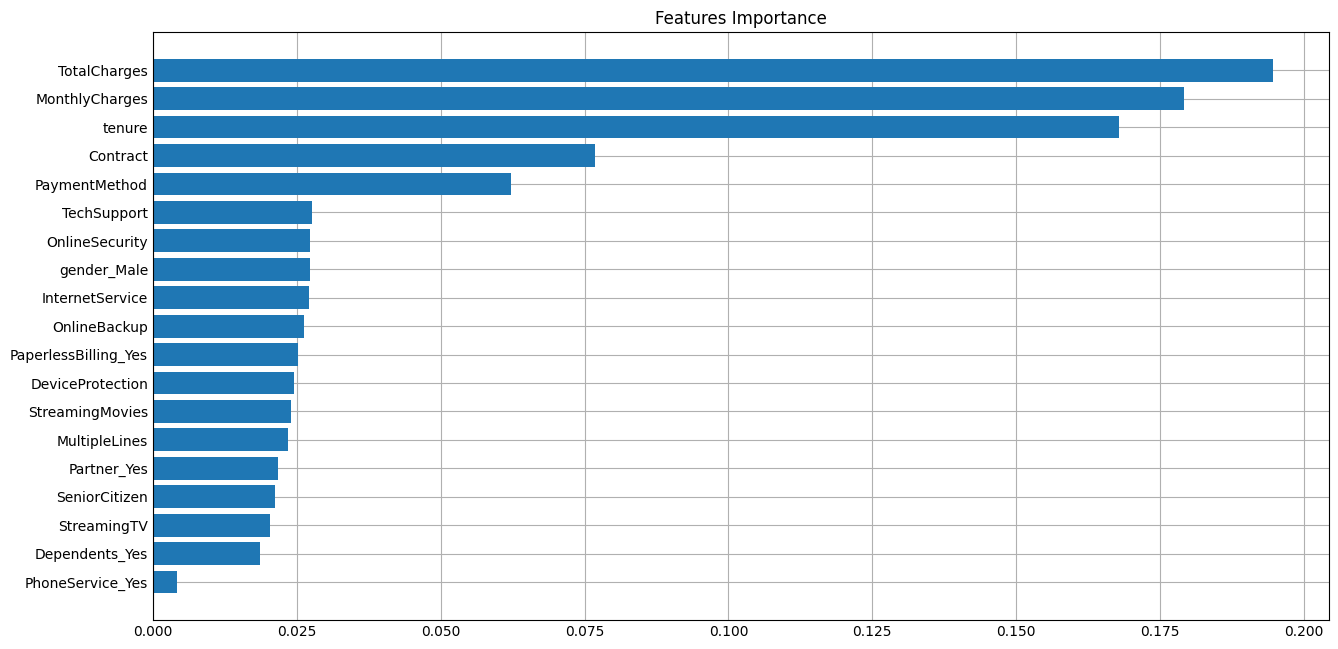

In [237]:
feature_importance = rfc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Features Importance')

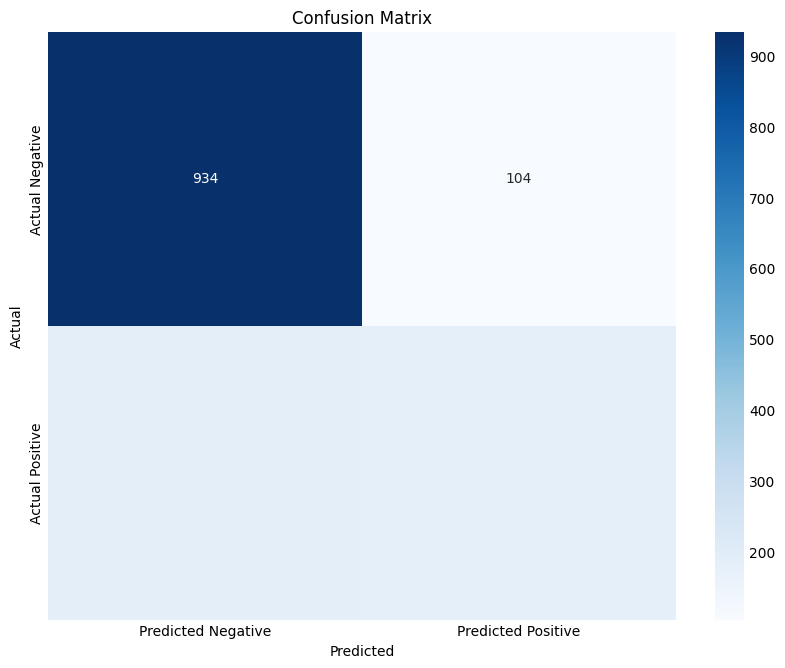

In [238]:
confusion = confusion_matrix(y_test, y_pred_rc)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap = 'Blues', cbar=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [239]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1038
           1       0.46      0.50      0.47       369

    accuracy                           0.71      1407
   macro avg       0.64      0.64      0.64      1407
weighted avg       0.72      0.71      0.72      1407



Text(0.5, 1.0, 'Features Importance')

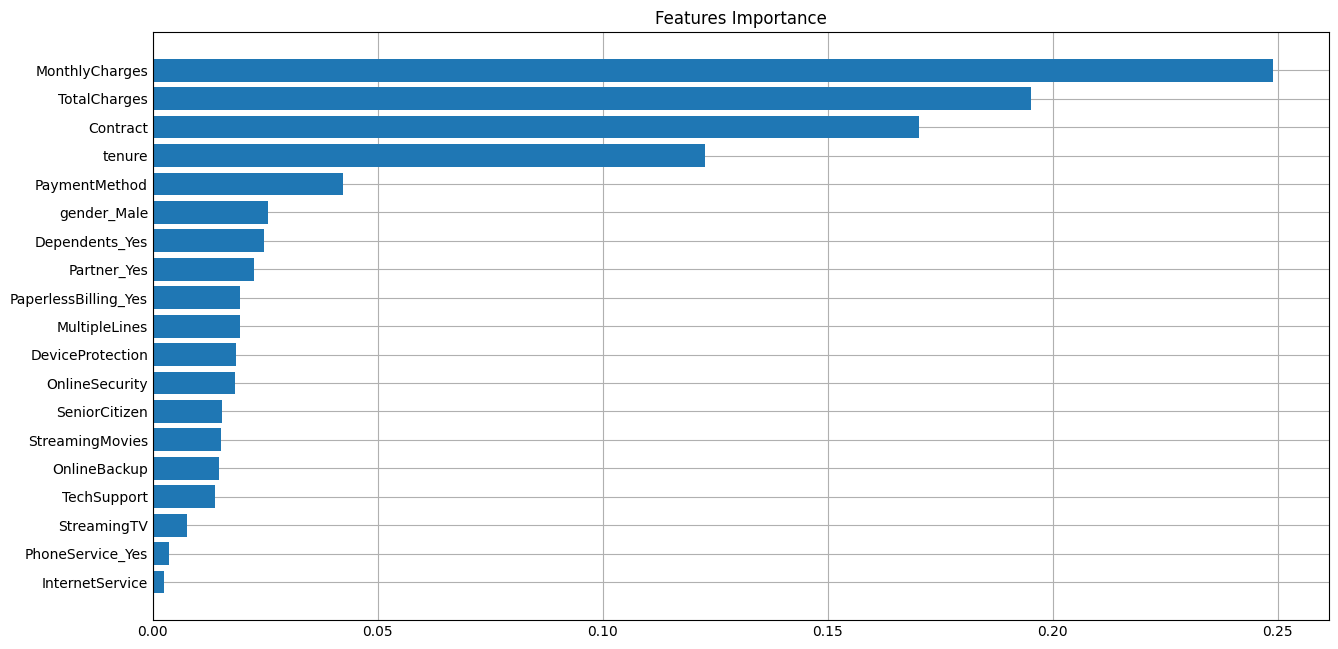

In [240]:
feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Features Importance')

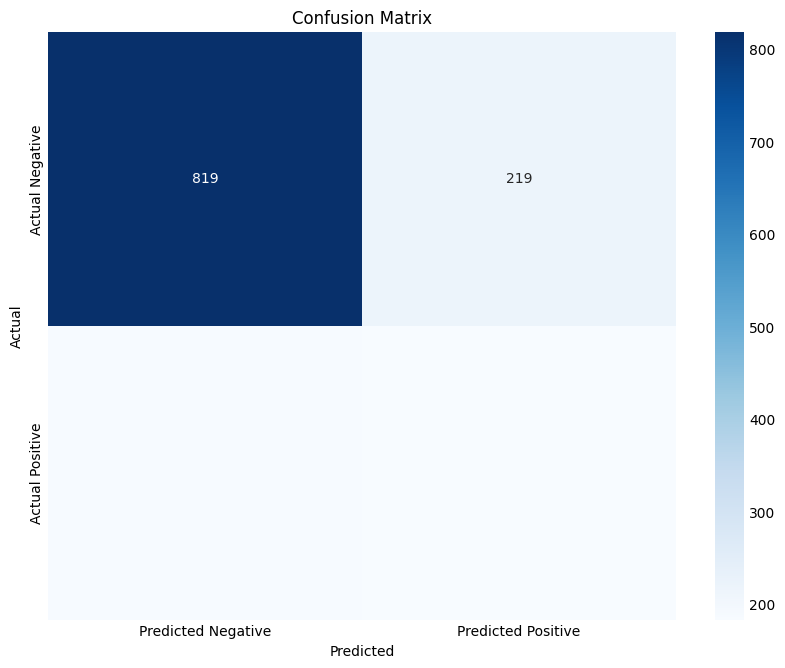

In [241]:
confusion = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap = 'Blues', cbar=True,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [242]:
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.metrics import classification_report_imbalanced
bbc = BalancedBaggingClassifier(base_estimator=SVC(C= 12.492718723288649, gamma = 0.04363830161271144, kernel= 'poly'),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=0)
bbc.fit(X_train, y_train)
y_pred_bbc = bbc.predict(X_test)
print(classification_report_imbalanced(y_test, y_pred_bbc))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.74      0.76      0.81      0.75      0.57      1038
          1       0.51      0.76      0.74      0.61      0.75      0.57       369

avg / total       0.80      0.75      0.76      0.76      0.75      0.57      1407

